### Import libraries

In [29]:
# Scientific 
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt

# Image
import cv2 as cv
from PIL import Image

# Deep learning
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from keras.utils import to_categorical

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Others
import os
import glob
import warnings
warnings.filterwarnings("ignore")

### Find dataset path

In [2]:
# print current working directory
print(f"current working directory: {os.getcwd()}")

# Change directory
os.chdir("/home/afsharino/Desktop/icds final project/dataset")

# list all of file in directory
print(f"list of directories in {os.getcwd()}: {os.listdir()}")


# print current working directory
print(f"current working directory: {os.getcwd()}")

current working directory: /home/afsharino/Desktop/icds final project/src
list of directories in /home/afsharino/Desktop/icds final project/dataset: ['laptop', 'mobile', 'cleaned.rar']
current working directory: /home/afsharino/Desktop/icds final project/dataset


### Load dataset

In [3]:
def read(folder_name:str):
    # Define the path to the directory containing the images
    path = r'/home/afsharino/Desktop/icds final project/dataset'

    # Define the size of the images
    image_size = (150, 150)
    
    # Define empty lists to store the images and labels
    images = []
    labels = []
    
    # Loop over the image files in the directory
    for directory in glob.glob(path + "/" + folder_name + "/*"):
        for image in os.listdir(directory):
            if image.endswith('.jpg'):
                image_path = directory+'/'+image
                try:
                    with Image.open(image_path) as img:
                        img = img.resize(image_size)  # resize the image
                        img = np.asanyarray(img)
                        images.append(img)
                        labels.append(folder_name)
                except Exception as e:
                    print(e)
                    print(f"can't import {image}.")
                    
    return images, labels

In [4]:
# Read images from laptop directory
lap_imgs, lap_labels = read(folder_name='laptop')

# Read images from mobile directory
mob_imgs, mob_labels = read(folder_name='mobile')

# Concatenate two lists
images = lap_imgs + mob_imgs
labels = lap_labels + mob_labels

# Convert the lists to NumPy arrays
images = np.array(images, dtype="float32")
labels = np.array(labels)

# Encode the string labels to integer labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)

### Define the neural network architecture

In [5]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=2, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Model Summary
model.summary()

2023-04-08 03:13:13.307249: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-08 03:13:13.438558: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

### augmentation

In [6]:
datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode="nearest"
    )

### Train the model

In [7]:
x_train, x_test, y_train, y_test = train_test_split(images, labels,stratify=labels, test_size=0.25)

In [8]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=15, validation_data=(x_test,y_test))

Epoch 1/15
66/66 [==============================] - 57s 819ms/step - loss: 0.6968 - accuracy: 0.5905 - val_loss: 25.4048 - val_accuracy: 0.7076
Epoch 2/15
66/66 [==============================] - 55s 828ms/step - loss: 0.5564 - accuracy: 0.7229 - val_loss: 43.0647 - val_accuracy: 0.7803
Epoch 3/15
66/66 [==============================] - 56s 843ms/step - loss: 0.4677 - accuracy: 0.7681 - val_loss: 32.4645 - val_accuracy: 0.8103
Epoch 4/15
66/66 [==============================] - 59s 895ms/step - loss: 0.4445 - accuracy: 0.7962 - val_loss: 42.8246 - val_accuracy: 0.8288
Epoch 5/15
66/66 [==============================] - 60s 906ms/step - loss: 0.4075 - accuracy: 0.8176 - val_loss: 50.0603 - val_accuracy: 0.8374
Epoch 6/15
66/66 [==============================] - 60s 913ms/step - loss: 0.3915 - accuracy: 0.8295 - val_loss: 63.4145 - val_accuracy: 0.8274
Epoch 7/15
66/66 [==============================] - 57s 863ms/step - loss: 0.3863 - accuracy: 0.8276 - val_loss: 49.3748 - val_accuracy:

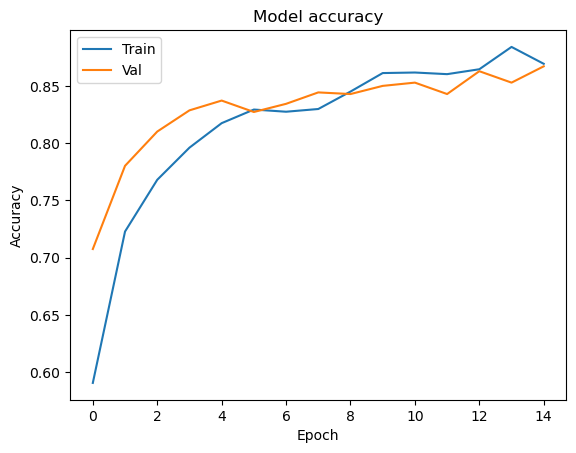

In [9]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


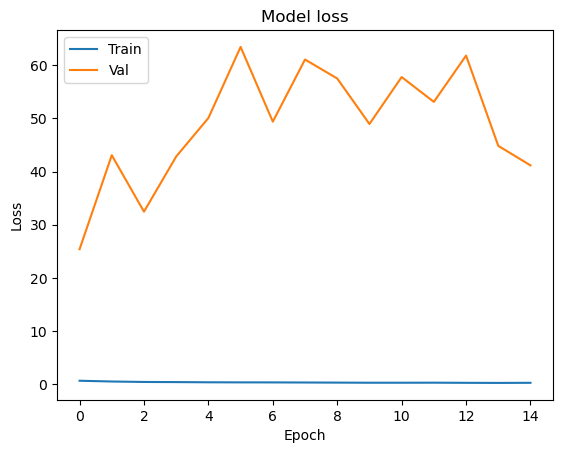

In [10]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [36]:
# Load the pre-trained VGG16 model and freeze its layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False
    
# Add new layers on top of the pre-trained VGG16
model1 = Sequential()
model1.add(base_model)
model1.add(Flatten())
model1.add(Dense(units=128, activation='relu'))
model1.add(Dropout(rate=0.2))
model1.add(Dense(units=2, activation='sigmoid'))

# Train the model with a small learning rate
model1.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), metrics=['accuracy'])
history1 = model1.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=15, validation_data=(x_test,y_test))

Epoch 1/15
66/66 [==============================] - 203s 3s/step - loss: 0.6723 - accuracy: 0.6129 - val_loss: 3.5150 - val_accuracy: 0.7190
Epoch 2/15
66/66 [==============================] - 205s 3s/step - loss: 0.5507 - accuracy: 0.7829 - val_loss: 2.6093 - val_accuracy: 0.8046
Epoch 3/15
66/66 [==============================] - 211s 3s/step - loss: 0.4685 - accuracy: 0.8367 - val_loss: 2.6234 - val_accuracy: 0.8188
Epoch 4/15
66/66 [==============================] - 207s 3s/step - loss: 0.4102 - accuracy: 0.8705 - val_loss: 2.7054 - val_accuracy: 0.8317
Epoch 5/15
66/66 [==============================] - 215s 3s/step - loss: 0.3710 - accuracy: 0.8733 - val_loss: 2.8146 - val_accuracy: 0.8474
Epoch 6/15
66/66 [==============================] - 214s 3s/step - loss: 0.3392 - accuracy: 0.8838 - val_loss: 2.8410 - val_accuracy: 0.8488
Epoch 7/15
66/66 [==============================] - 208s 3s/step - loss: 0.3279 - accuracy: 0.8790 - val_loss: 3.0987 - val_accuracy: 0.8474
Epoch 8/15
66

In [37]:
# Fine-tune the model by unfreezing some layers
for layer in base_model.layers[-4:]:
    layer.trainable = True

model1.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=1e-6), metrics=['accuracy'])
history1 = model1.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
66/66 [==============================] - 409s 6s/step - loss: 0.9050 - accuracy: 0.7395 - val_loss: 16.2356 - val_accuracy: 0.8317
Epoch 2/5
66/66 [==============================] - 406s 6s/step - loss: 0.2847 - accuracy: 0.8848 - val_loss: 14.8427 - val_accuracy: 0.8688
Epoch 3/5
66/66 [==============================] - 408s 6s/step - loss: 0.2449 - accuracy: 0.9005 - val_loss: 10.5855 - val_accuracy: 0.9101
Epoch 4/5
66/66 [==============================] - 406s 6s/step - loss: 0.1968 - accuracy: 0.9257 - val_loss: 6.3955 - val_accuracy: 0.9215
Epoch 5/5
66/66 [==============================] - 408s 6s/step - loss: 0.1669 - accuracy: 0.9329 - val_loss: 11.6293 - val_accuracy: 0.9272


### Test the model 

In [43]:
def read_samples():
    images = []
    path = r'/home/afsharino/Desktop/icds final project/test'
    
    for image in os.listdir(path):
        image_path = path+'/'+image
        try:
            with Image.open(image_path) as img:
                img = img.resize((150, 150))  # resize the image
                img = np.asanyarray(img)
                images.append(img)
        except Exception as e:
            print(e)
            print(f"can't import {image}.")

    return images

In [50]:
def predict(model):
    images = read_samples()
    for i, image in enumerate(images):
        plt.subplot(1,6, i+1)
        predict = model.predict(image.reshape(-1,150,150,3))
        if (predict == [[1.0, 0.0]]).all():
            plt.title('laptop')
        else:
            plt.title('mobile')
        plt.imshow(image)
        plt.axis('off')   

1/1 [==============================] - 0s 42ms/step


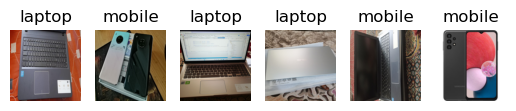

In [51]:
predict(model)

1/1 [==============================] - 0s 153ms/step


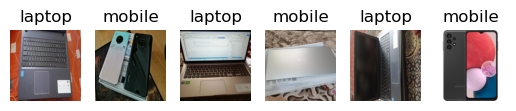

In [52]:
predict(model1)